# ANN Intro

This NB is constructed such that it also runs in reasonable time on Laptop CPUs (e.g. an i3)

## Local Setup

There are different options to set up the TensorFlow library (which now includes [Keras](https://keras.io) as backend library) on your own computer. The simplest of them is using only the CPU and can be installed in 1 command via [`conda`](https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/), in an anaconda shell run:

```
conda install tensorflow
```

**NOTE**: TF migth not be compatible with your current environment, so here we create a [new environment](https://conda.io/docs/user-guide/tasks/manage-environments.html#creating-an-environment-with-commands) first:

```
conda create -n tf tensorflow
conda activate tf
```

In that case you need to install jupyter, scikit-learn, matplotlib, numpy and pandas in that environment again, with e.g.:

```
conda install jupyter scikit-learn matplotlib numpy pandas
```

(If you have a [supported Nvidia graphics card](https://developer.nvidia.com/cuda-gpus) in your machine and would like to use it for accelerated network training, make sure to follow [this guide](https://www.tensorflow.org/install/gpu) to install required packages and finally use the `tensorflow-gpu` library.)

The usage of the TensorFlow library in Python will be the same for CPU and GPU.

In [2]:
## fetch MNIST dataset (as done in last NB)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1) # ('MNIST original')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [13]:
## Scale the input data into the range [0, 1]
from sklearn.model_selection import train_test_split
X, y= mnist["data"], mnist["target"]
X  = X/255.0
print (X.shape)


## use sklearn's train_test_split to split the data into 

## 50000 instances for training (X_train, y_train), 10000 for validation (X_val, y_val) and 10000 for testing (X_test, y_test)
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=10000, random_state=42)

X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=10000, random_state=42) 
print (X_train.shape)

(70000, 784)
(50000, 784)


In [49]:
## load an MLP classifier from sklearn with all its defaults, only specifying `random_state=42`
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)


## try printing out the sizes of the hidden layers, the number of layers and the number of output neurons/units
print(mlp.get_params())
print(mlp_2.hidden_layer_sizes)

## train the MLP with the train set, time its execution
%time mlp=mlp.fit(X_train, y_train)
## try again printing out the sizes of the hidden layers, the number of layers and the number of output neurons/units


{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Wall time: 1min 38s


In [45]:
## print the scores of the trained MLP on the train and on the test set:
print("Training set score: %f" % mlp.score(X_train, y_train) )
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.998960
Test set score: 0.970700


### Questions 1

1. What are the default values assumed for the MLPClassifier of sklearn?
2. What MLP ist constructed with the defaults? \
   I.e. how many hidden layers and how many input, hidden and output neurons/units does the MLP have?

### Answers

1. the default values : 
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 100, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 2, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

2. 
hidden_layer =1

input neurons= 50000

hidden layer neurons= 100

outputlayer neurons = 10


In [56]:
## Now construct another MLP classifier as above but with 2 hidden layers of 100 and 50 neurons/units.
## In addition it should used mini-batch gradient descent (mBGD) with a mini-batch size of 100
mlp_2 = MLPClassifier(random_state=42,hidden_layer_sizes = (100,50),batch_size=100)
## and train only for 100 epochs.
mlp_2 = MLPClassifier(random_state=42,hidden_layer_sizes = (100,50),batch_size=100,max_iter=100)
## try printing out the sizes of the hidden layers, the number of layers and the number of output neurons/units
print(mlp_2.hidden_layer_sizes)
## train the MLP with the train set, time its execution
%time mlp_2 = MLPClassifier(random_state=42,hidden_layer_sizes = (100,50),batch_size=100,max_iter=100).fit(X_train, y_train)
## try again printing out the sizes of the hidden layers, the number of layers and the number of output neurons/units


(100, 50)
Wall time: 2min 5s


In [57]:
## print the scores of the trained MLP on the train and on the test set:
print("Training set score: %f" % mlp_2.score(X_train, y_train))
print("Test set score: %f" % mlp_2.score(X_test, y_test))

Training set score: 0.997360
Test set score: 0.971800


In [64]:
def n_params(model): # from: https://stackoverflow.com/questions/59078110/way-to-count-the-number-of-parameters-in-a-scikit-learn-model
    """Return total number of parameters in a 
    Scikit-Learn model.

    This works for the following model types:
     - sklearn.neural_network.MLPClassifier
     - sklearn.neural_network.MLPRegressor
     - sklearn.linear_model.LinearRegression
     - and maybe some others
    """
    return (sum([a.size for a in model.coefs_]) +  
            sum([a.size for a in model.intercepts_]))

## use the given function to get the number of model parameters of the last MLP
par_num= n_params(mlp_2)
print(par_num)

84060


### Questions 2

1. Does the returned number of parameters match your expectations? Write down your own calculation!


### Answers

1. 

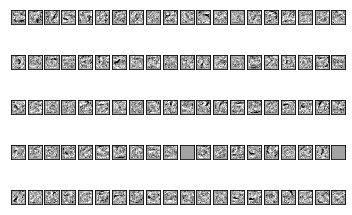

In [61]:
## Now use the example from: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html
## to plot ALL weight matrices of the first layer of the MLP trained above
## using subplots with 20 columns.
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 20)
vmin, vmax = mlp_2.coefs_[0].min(), mlp_2.coefs_[0].max()
for coef, ax in zip(mlp_2.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


Now it's time to test your TensorFlow installation by importing the package. The following code cell should execute without errors:

In [68]:
import tensorflow as tf

Now let's check which computing devices TensorFlow has found on this machine. If you don't have the GPU setup on your computer, the list should just contain one CPU: `/device:CPU:0` 

In [66]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12091816428630043739
]


The cell below creates a similar MLP as above using tf.keras, see also this [tutorial network](https://github.com/keras-team/keras/blob/fcc0bfa354c5a47625d681d0297a66ef9ff43a9e/examples/mnist_mlp.py) which also uses the MNIST dataset.

Keras has a nice method `model.summary()` that prints a tabular overview of your network architecture, together with the input/output dimensions and number of parameters for each layer.

In [71]:
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 100
num_classes = 10
epochs = 200

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

## convert class vectors to binary class matrices
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(250, activation='relu', input_shape=(784,)))
model.add(Dense( 100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_c,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_c))

2.3.0
2.4.0
50000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
500/500 [==============================] - 2s 4ms/step - loss: 0.2814 - accuracy: 0.9193 - val_loss: 0.1436 - val_accuracy: 0.9576
Epoch 2/200
500/500 [==============================] - 2s 3ms/step - loss: 0.1075 - accuracy: 0.9671 - val_loss: 0.1122 - val_accuracy: 0.9657
Epoch 3/200
500/500 [====================

500/500 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.1797 - val_accuracy: 0.9761
Epoch 53/200
500/500 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.1650 - val_accuracy: 0.9788
Epoch 54/200
500/500 [==============================] - 2s 5ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1721 - val_accuracy: 0.9782
Epoch 55/200
500/500 [==============================] - 2s 4ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.1999 - val_accuracy: 0.9746
Epoch 56/200
500/500 [==============================] - 2s 4ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.1653 - val_accuracy: 0.9797
Epoch 57/200
500/500 [==============================] - 2s 4ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.1723 - val_accuracy: 0.9781
Epoch 58/200
500/500 [==============================] - 2s 4ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.1767 - val_accuracy: 0.9769
Epoch

500/500 [==============================] - 2s 4ms/step - loss: 1.9268e-07 - accuracy: 1.0000 - val_loss: 0.2000 - val_accuracy: 0.9804
Epoch 109/200
500/500 [==============================] - 2s 4ms/step - loss: 1.5723e-07 - accuracy: 1.0000 - val_loss: 0.2011 - val_accuracy: 0.9805
Epoch 110/200
500/500 [==============================] - 2s 4ms/step - loss: 1.2822e-07 - accuracy: 1.0000 - val_loss: 0.2024 - val_accuracy: 0.9805
Epoch 111/200
500/500 [==============================] - 2s 4ms/step - loss: 1.0395e-07 - accuracy: 1.0000 - val_loss: 0.2036 - val_accuracy: 0.9805
Epoch 112/200
500/500 [==============================] - 2s 4ms/step - loss: 8.4095e-08 - accuracy: 1.0000 - val_loss: 0.2048 - val_accuracy: 0.9806
Epoch 113/200
500/500 [==============================] - 2s 4ms/step - loss: 6.8209e-08 - accuracy: 1.0000 - val_loss: 0.2064 - val_accuracy: 0.9808
Epoch 114/200
500/500 [==============================] - 2s 4ms/step - loss: 5.5120e-08 - accuracy: 1.0000 - val_loss: 0

500/500 [==============================] - 3s 6ms/step - loss: 2.2888e-10 - accuracy: 1.0000 - val_loss: 0.2394 - val_accuracy: 0.9803
Epoch 164/200
500/500 [==============================] - 2s 5ms/step - loss: 2.2888e-10 - accuracy: 1.0000 - val_loss: 0.2393 - val_accuracy: 0.9803
Epoch 165/200
500/500 [==============================] - 2s 4ms/step - loss: 2.2888e-10 - accuracy: 1.0000 - val_loss: 0.2394 - val_accuracy: 0.9803
Epoch 166/200
500/500 [==============================] - 2s 5ms/step - loss: 2.4557e-10 - accuracy: 1.0000 - val_loss: 0.2393 - val_accuracy: 0.9803
Epoch 167/200
500/500 [==============================] - 2s 4ms/step - loss: 2.0742e-10 - accuracy: 1.0000 - val_loss: 0.2391 - val_accuracy: 0.9803
Epoch 168/200
500/500 [==============================] - 2s 5ms/step - loss: 2.2650e-10 - accuracy: 1.0000 - val_loss: 0.2392 - val_accuracy: 0.9804
Epoch 169/200
500/500 [==============================] - 2s 4ms/step - loss: 2.1219e-10 - accuracy: 1.0000 - val_loss: 0

In [72]:
score = model.evaluate(X_test, y_test_c, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23840875923633575
Test accuracy: 0.980400025844574


You should see the training going through the epochs and in the end the trained network is evaluated on the test set. 
It shoud reache at least a classification accurary of 97%.

### Exercise

Now try to tune the hyper-parameters of the MLP to achieve more than 98% accuracy.\
List the parameters you changed to achieve this score.